
## DM Final Project
### Spring 2023

# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
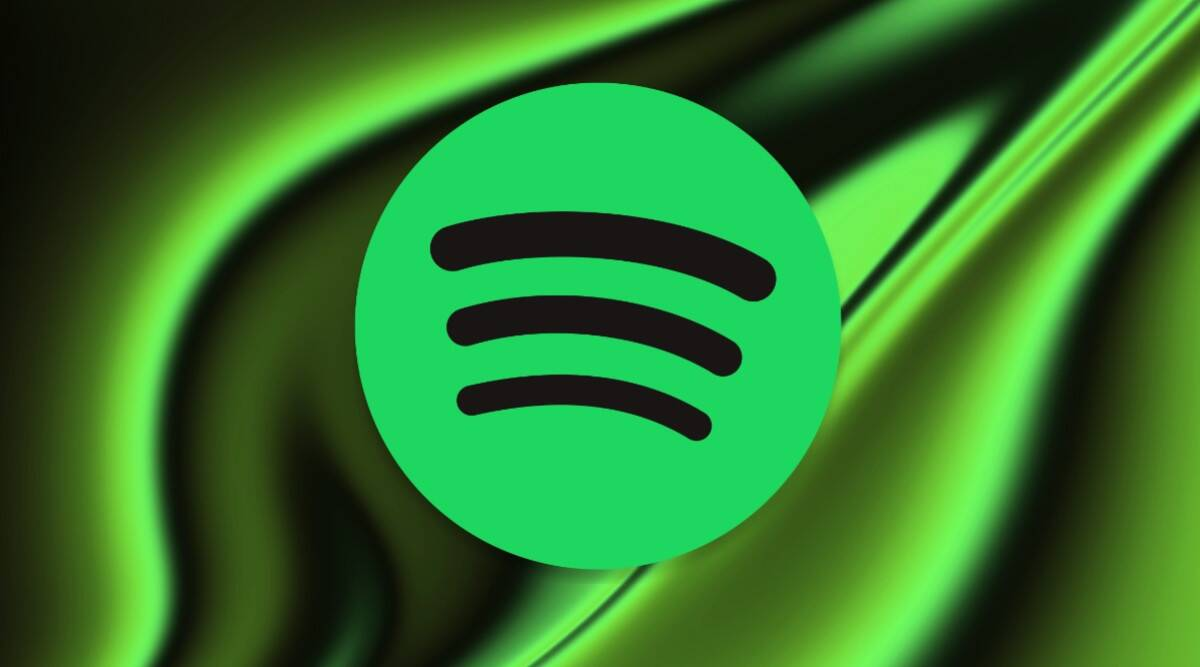
</div>

# Import Libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)
from pprint import pprint

In [113]:
%pwd

'/content'

# Load Spotify Dataset (CSV file)

In [114]:
spotify_df = pd.read_csv("Spotfiy_Persian_Artists.csv")
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [115]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [116]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

## Q: Get number of songs by each of the artists in descending order

In [117]:
# To be completed
# Group the DataFrame by 'artist_name' and count the number of songs for each artist
artist_counts = spotify_df['artist_name'].value_counts(normalize=False, sort=True
                                                       , ascending=False)
print(artist_counts)

Mohammadreza Shajarian    554
Hossein Alizadeh          545
Reza Sadeghi              507
Dariush                   465
Alireza Eftekhari         439
                         ... 
Nasser Abdollahi           22
Mohammad Golriz            17
Ebrahim Monsefi            16
Farman Fathalian           10
Koveyti Poor                9
Name: artist_name, Length: 69, dtype: int64


## Q: Get the average duration of songs by each of the artists in minutes

In [118]:
# To be completed
# Convert the 'duration_ms' column to minutes
spotify_df['duration_ms'] = spotify_df['duration_ms']/ 60000
# Group the DataFrame by 'artist_name' and calculate the average duration for each artist
artist_avg_duration = spotify_df.groupby('artist_name')['duration_ms'].mean()
#A groupby operation involves some combination of splitting the object, applying a function, and combining the results.
print(artist_avg_duration)

artist_name
Abbas Ghaderi            5.074705
Abdolhosein Mokhtabad    6.228769
Afshin Moghaddam         4.100780
Ali Lohrasbi             3.602079
Ali Zand Vakili          4.854786
                           ...   
Siavash Ghomayshi        4.341582
Sirvan Khosravi          4.352529
Soheil Nafissi           3.063580
Tohi                     3.523408
Xaniar Khosravi          3.934065
Name: duration_ms, Length: 69, dtype: float64


## Q: list of artist's unique names

In [119]:
# To be completed
#unique artist names from the 'artist_name' column
unique_artists = spotify_df['artist_name'].unique()
#Return unique values based on a hash table.
print(unique_artists)

['Salar Aghili' 'Mohsen Yeganeh' 'Mehdi Yarrahi' 'Mohammadreza Shajarian'
 'Morteza Pashaei' 'Hesameddin Seraj' 'Mohammad Esfahani'
 'Mohsen Chavoshi' 'Reza Sadeghi' 'Abdolhosein Mokhtabad' 'Alireza Assar'
 'Roozbeh Nematollahi' 'Hossein Alizadeh' 'Peyman Yazdanian'
 'Kayhan Kalhor' 'Siavash Ghomayshi' 'Benyamin Bahadori'
 'Alireza Eftekhari' 'Majid Akhshabi' 'Faramarz Aslani' 'Iraj Bastami'
 'Ehsan Khajeh Amiri' 'Alireza Ghorbani' 'Parviz Meshkatian'
 'Mohammad Reza Lotfi' 'Dang Show' 'Nasser Abdollahi' 'Soheil Nafissi'
 'Farhad Mehrad' 'Afshin Moghaddam' 'Koveyti Poor' 'Mohammad Golriz'
 'Abbas Ghaderi' 'Javad Yassari' 'Sattar' 'Mohsen Sharifian'
 'Babak Jahanbakhsh' 'Mazyar Fallahi' 'Mohammad Alizadeh' 'Farzad Farzin'
 'Ali Zand Vakili' 'Amirabbas Golab' 'Hamid Askari' 'Mohsen Namjoo'
 'Hamed Homayoun' 'Kaveh Deylami' 'Hatam Asgari' 'Hamid Hami'
 'Shahram Shabpareh' 'Moein' 'Hassan Shamaizadeh' 'Faramarz Assef'
 'Dariush' 'Amir Tataloo' 'Rastak' 'Macan Band' 'Sasy' 'Tohi'
 'Homayoun

## Q: Plot average duration of tracks by year

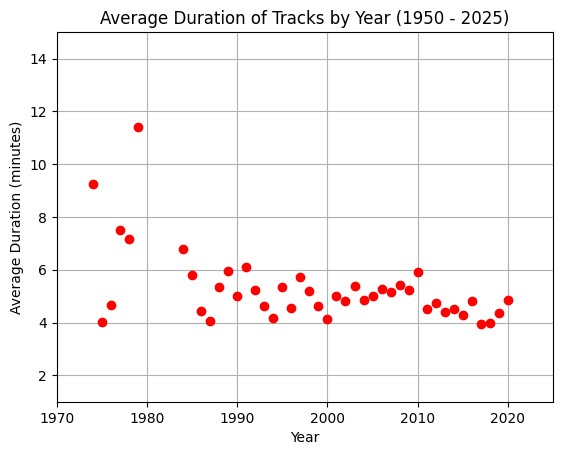

In [120]:
# To be completed
# Group the DataFrame by 'album_release_year' attribute and
# calculate the average duration for each year
avg_duration_by_year = spotify_df.groupby('album_release_year')['duration_ms'].mean()

# Plot the average duration by year
plt.plot(avg_duration_by_year.index, avg_duration_by_year.values,'ro')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Duration of Tracks by Year (1950 - 2025)')
plt.axis([1970, 2025, 1, 15])
# Display the plot
plt.show()

## Q: Plot average loudness of tracks by year


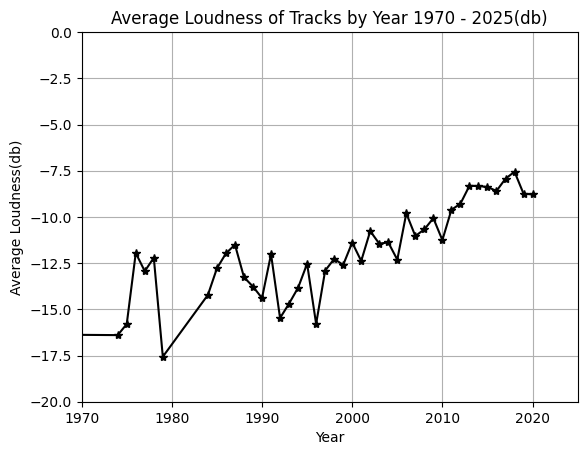

Overall loudness of a track is in decibels (dB) averaged across the entire track. Values between -60 dB and 0 dB, with 0 being the loudest.


In [121]:
# To be completed
# Group the DataFrame by 'album_release_year' and calculate the average loudness for each year
avg_loudness_by_year = spotify_df.groupby('album_release_year')['loudness'].mean()

# Plot the average loudness by year
plt.plot(avg_loudness_by_year.index, avg_loudness_by_year.values,'k*-')

# Customize the plot
plt.grid()
plt.xlabel('Year')
plt.ylabel('Average Loudness(db)')
plt.title('Average Loudness of Tracks by Year 1970 - 2025(db)')
plt.axis([1970, 2025, -20, 0])
# Display the plot
plt.show()
print("Overall loudness of a track is in decibels (dB) averaged across the entire track. Values between -60 dB and 0 dB, with 0 being the loudest.")

## Q: Music attributes of songs over the years


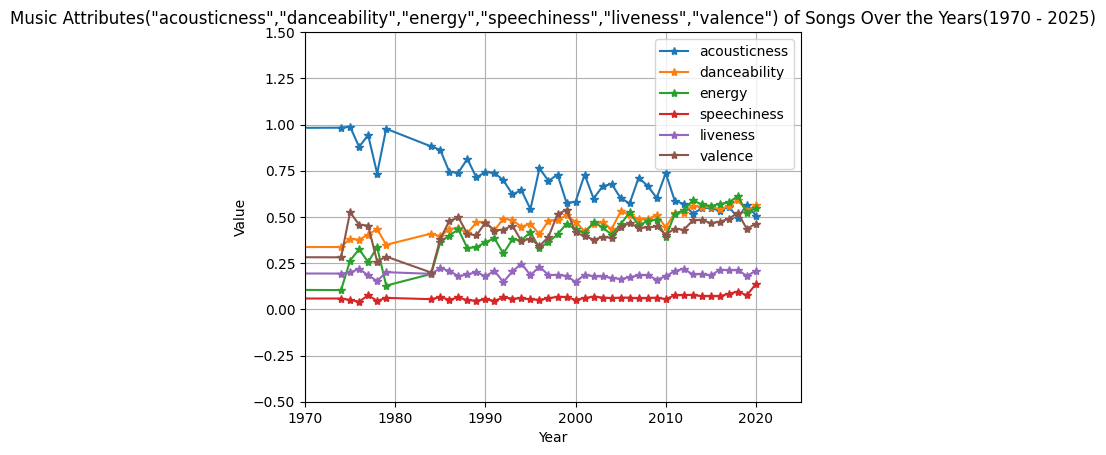

In [122]:
# To be completed
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]
# Group the DataFrame by 'album_release_year' and calculate the average of each target column for each year
avg_attributes_by_year = spotify_df.groupby('album_release_year')[target_cols].mean()

# Plot the attributes over the years
for col in target_cols:
    plt.plot(avg_attributes_by_year.index, avg_attributes_by_year[col],"*-", label=col)

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Music Attributes("acousticness","danceability","energy","speechiness","liveness","valence") of Songs Over the Years(1970 - 2025)')
plt.legend(loc='upper right')
plt.grid()
plt.axis([1970, 2025, -0.5, 1.5])
plt.show()

## Q: Plot top 10 popular tracks (Bar Chart)

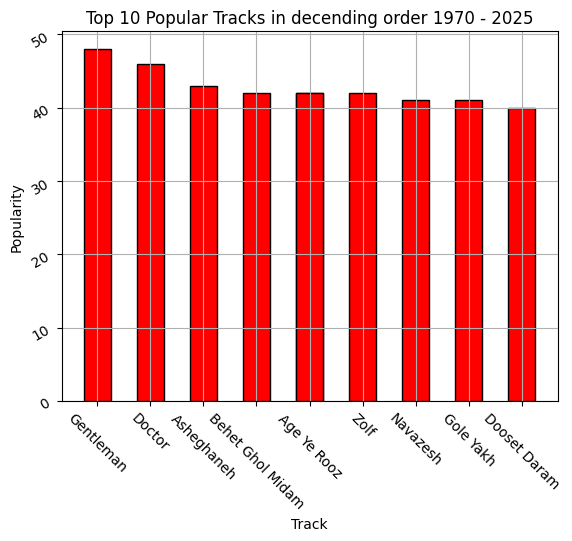

Popularity is A value will be between 0 and 100, with 100 being the most popular
based on total number of plays the track has had and how recent those plays are.


In [123]:
# To be completed

# Sort the DataFrame by 'popularity' column in descending order and select the top 10 tracks
top_10_tracks = spotify_df.nlargest(10, 'popularity')

# Create a bar chart of the top 10 tracks
plt.bar(top_10_tracks['track_name'], top_10_tracks['popularity'], width=0.5, color = 'r', edgecolor = 'k' )

# Customize the plot
plt.xlabel('Track')
plt.ylabel('Popularity')
plt.title('Top 10 Popular Tracks in decending order 1970 - 2025')
plt.grid()
# Rotate the axis labels for better readability if needed
plt.xticks(rotation=-45)
plt.yticks(rotation=30)
plt.show()
print("Popularity is A value will be between 0 and 100, with 100 being the most popular")
print("based on total number of plays the track has had and how recent those plays are.")

## Q: Plot top 10 popular artist (Bar Chart)

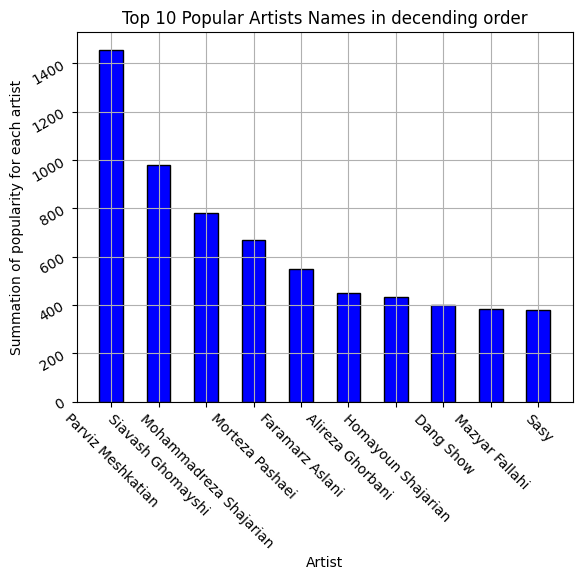

In [124]:
# To be completed
# Group the DataFrame by 'artist_name' and calculate the sum of 'popularity' for each artist
artist_popularity = spotify_df.groupby('artist_name')['popularity'].sum()

# Sort the artist popularity in descending order and select the top 10 artists
top_10_artists = artist_popularity.nlargest(10)

# Create a bar chart of the top 10 popular artists
plt.bar(top_10_artists.index, top_10_artists.values, width = 0.5, color = 'b', edgecolor = 'k')
plt.xlabel('Artist')
plt.ylabel('Summation of popularity for each artist')
plt.title('Top 10 Popular Artists Names in decending order')
plt.grid()
# Rotate the axis labels for better readability if needed
plt.xticks(rotation=-45)
plt.yticks(rotation=30)
plt.show()

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

<ipython-input-125-e5c38540190c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = spotify_df.corr(method='pearson') # standard correlation coefficient


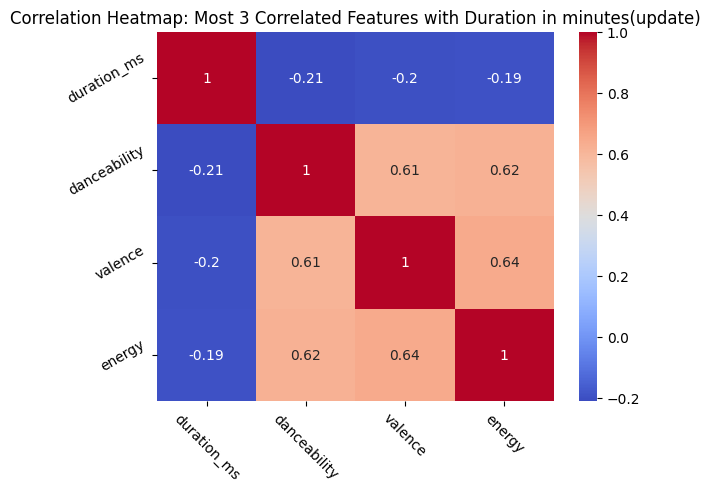

In [125]:
# To be completed
# Duration_Ms

# Calculate the correlation matrix
correlation_matrix = spotify_df.corr(method='pearson') # standard correlation coefficient
# Find the most correlated features with 'duration'
most_correlated_features = correlation_matrix['duration_ms'].abs().nlargest(4).index

# Filter the correlation matrix to include only the 'duration' column and the most correlated features
correlation_subset = correlation_matrix.loc[most_correlated_features, most_correlated_features]

# Create a heatmap of the correlation subset
sns.heatmap(correlation_subset, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: Most 3 Correlated Features with Duration in minutes(update)')
plt.xticks(rotation=-45)
plt.yticks(rotation=30)
plt.show()

<ipython-input-126-97c4ceb930eb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = spotify_df.corr(method='pearson') # standard correlation coefficient


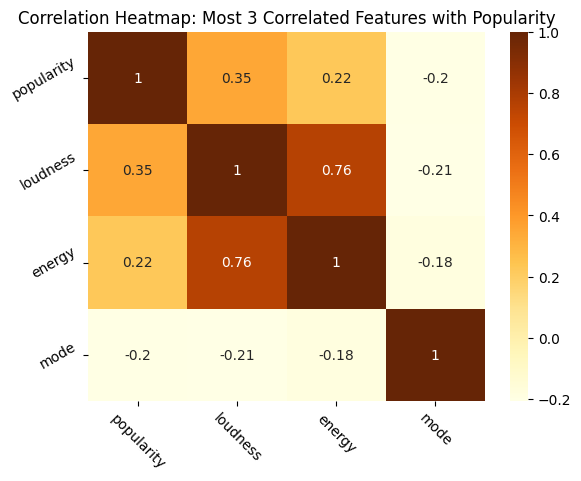

In [126]:
# To be completed
# Popularity

# Calculate the correlation matrix
correlation_matrix = spotify_df.corr(method='pearson') # standard correlation coefficient
# Find the most correlated features with 'duration'
most_correlated_features = correlation_matrix['popularity'].abs().nlargest(4).index

# Filter the correlation matrix to include only the 'duration' column and the most correlated features
correlation_subset = correlation_matrix.loc[most_correlated_features, most_correlated_features]

# Create a heatmap of the correlation subset
sns.heatmap(correlation_subset, annot=True, cmap="YlOrBr") #annot: to write values in data cells
plt.title('Correlation Heatmap: Most 3 Correlated Features with Popularity')
plt.xticks(rotation=-45)
plt.yticks(rotation=30)
plt.show()

## Q: Plot box-plot for each feature
Compare box-plot values of `energy` and `liveness`

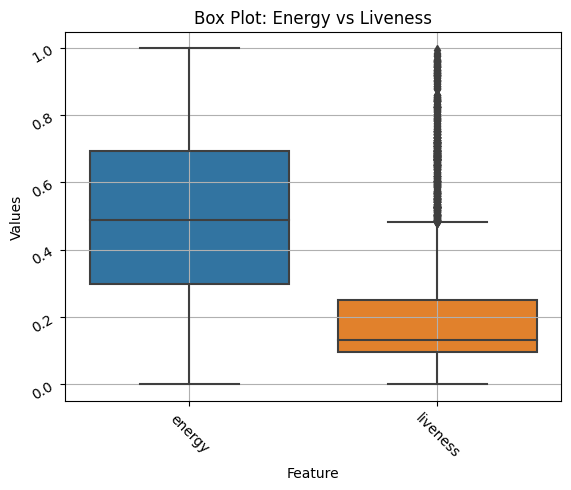

In [127]:
# To be completed
# Select the columns of interest
columns_of_interest = ['energy', 'liveness']
# Subset the DataFrame with the selected columns
subset_df = spotify_df[columns_of_interest]
# Plot the box plots
sns.boxplot(data=subset_df)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot: Energy vs Liveness')
plt.grid()
# Rotate the axis labels for better readability if needed
plt.xticks(rotation=-45)
plt.yticks(rotation=30)
plt.show()

## Q: Missing values
How many `nan` values are there in each column?

In [128]:
# To be completed
# Count the number of NaN values in each column
nan_counts = spotify_df.isna().sum()
# Print the NaN counts for each column
print(nan_counts)

track_id                  0
disc_number               0
duration_ms               0
explicit                  0
track_name                0
track_name_farsi      10020
artist_name               0
artist_name_farsi         0
popularity             9701
track_number              0
album_href             9701
album_id                  0
album_name                0
album_release_date        0
album_total_tracks     9701
album_release_year        0
track_href                0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
key_name                144
mode_name               144
key_mode                144
dtype: int64


# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [129]:
spotify_df = pd.read_csv("Spotfiy_Persian_Artists.csv")
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


In [130]:
# To be completed
# Categorical Features
spotify_df['track_name_farsi'].fillna('None', inplace=True) #If True, fill in-place.
spotify_df['album_href'].fillna('None', inplace=True)
spotify_df['key_name'].fillna('None', inplace=True)
spotify_df['mode_name'].fillna('None', inplace=True)
spotify_df['key_mode'].fillna('None', inplace=True)
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,None,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,None,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,None,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,None,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,None,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


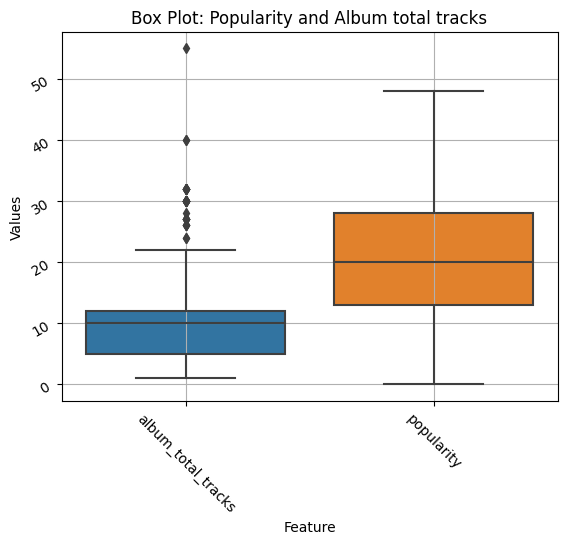

In [136]:
# To be completed
#First lets examine our features
# Select the columns of interest
columns_of_interest = ['album_total_tracks', 'popularity']
# Subset the DataFrame with the selected columns
subset_df = spotify_df[columns_of_interest]
# Plot the box plots
sns.boxplot(data=subset_df)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot: Popularity and Album total tracks')
plt.grid()
# Rotate the axis labels for better readability if needed
plt.xticks(rotation=-45)
plt.yticks(rotation=30)
plt.show()


In [137]:
spotify_df['popularity'].fillna(spotify_df['popularity'].mean(), inplace=True) #symetric datas with mean = 20
spotify_df['album_total_tracks'].fillna(spotify_df['album_total_tracks'].median(), inplace=True) #full of outliers and skewed
#mode is good for datas with small number of unique values
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,None,Salar Aghili,سالار عقیلی,20.113856,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,None,Salar Aghili,سالار عقیلی,20.113856,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,None,Salar Aghili,سالار عقیلی,20.113856,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,None,Salar Aghili,سالار عقیلی,20.113856,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,None,Salar Aghili,سالار عقیلی,20.113856,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


# Determine your desired features here

In [408]:
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.974417,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,3.080703,4.533367,1.996494,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,20.113856,2.000000,10.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.113856,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,20.113856,8.000000,10.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


In [409]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10632 entries, 0 to 10631
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   track_id            10632 non-null  object 
 1   disc_number         10632 non-null  int64  
 2   duration_ms         10632 non-null  int64  
 3   explicit            10632 non-null  bool   
 4   track_name          10632 non-null  object 
 5   track_name_farsi    10632 non-null  object 
 6   artist_name         10632 non-null  object 
 7   artist_name_farsi   10632 non-null  object 
 8   popularity          10632 non-null  float64
 9   track_number        10632 non-null  int64  
 10  album_href          10632 non-null  object 
 11  album_id            10632 non-null  object 
 12  album_name          10632 non-null  object 
 13  album_release_date  10632 non-null  object 
 14  album_total_tracks  10632 non-null  float64
 15  album_release_year  10632 non-null  int64  
 16  trac

In [462]:
music_feature_cols = [
     'energy', 'valence', 'key' ,'key_mode','key_name', 'track_name','acousticness' , 'liveness','album_release_year','album_release_date','loudness'
    ,'popularity'
]
#energy, valence and acousticness have experienced a various change during these years so they`ll be great for learning
#artist_name also needs to be normalized and label encoded
#danceability and liveness are also good for studying the changes over these years

In [463]:
tracks_feature_df = spotify_df[['artist_name'] + music_feature_cols].dropna()
tracks_feature_df

,artist_name,energy,valence,key,key_mode,key_name,track_name,acousticness,liveness,album_release_year,album_release_date,loudness,popularity
0,Salar Aghili,0.390,0.3300,0,C minor,C,Ghazale Taze,0.839,0.1360,2020,2/3/2020,-7.170,20.113856
1,Salar Aghili,0.146,0.3460,5,F major,F,Ayeeneye Hosn,0.970,0.0812,2020,2/3/2020,-10.008,20.113856
2,Salar Aghili,0.453,0.5010,5,F minor,F,Tarke Eshgh,0.664,0.1100,2020,2/3/2020,-5.392,20.113856
3,Salar Aghili,0.138,0.4450,2,D minor,D,Moghbacheye Bade Foroosh,0.915,0.2120,2020,2/3/2020,-12.287,20.113856
4,Salar Aghili,0.443,0.4100,0,C minor,C,Bigharar,0.657,0.1200,2020,2/3/2020,-5.702,20.113856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,Shahram Nazeri,0.499,0.3960,4,E minor,E,Zarbie Bayat Tork (Che Danestam),0.946,0.3530,1985,1/8/1985,-10.805,20.113856
10628,Shahram Nazeri,0.163,0.1610,5,F minor,F,Conserte Asatid,0.982,0.6670,2008,10/7/2008,-17.538,20.113856
10629,Shahram Nazeri,0.218,0.1390,8,G# major,G#,Soofi Nameh,0.883,0.2630,2008,10/7/2008,-15.865,20.113856
10630,Shahram Nazeri,0.304,0.2100,8,G# major,G#,Saghi Nameh,0.842,0.7980,2008,10/7/2008,-13.286,20.113856


## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models.

In [464]:
# To be completed
from sklearn.preprocessing import LabelEncoder
# Create an instance of LabelEncoder for Categorical Datas
label_encoder = LabelEncoder()
categorical_features = ['artist_name','key_mode','key_name','track_name','album_release_date']

# Transform the column using label encoding
for col in categorical_features:
  tracks_feature_df[col] = label_encoder.fit_transform(tracks_feature_df[col])
# ---> will create a problem in classification section
tracks_feature_df

,artist_name,energy,valence,key,key_mode,key_name,track_name,acousticness,liveness,album_release_year,album_release_date,loudness,popularity
0,58,0.390,0.3300,0,7,3,2722,0.839,0.1360,2020,558,-7.170,20.113856
1,58,0.146,0.3460,5,16,8,600,0.970,0.0812,2020,558,-10.008,20.113856
2,58,0.453,0.5010,5,17,8,6515,0.664,0.1100,2020,558,-5.392,20.113856
3,58,0.138,0.4450,2,11,5,4493,0.915,0.2120,2020,558,-12.287,20.113856
4,58,0.443,0.4100,0,7,3,1201,0.657,0.1200,2020,558,-5.702,20.113856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,61,0.499,0.3960,4,15,7,7475,0.946,0.3530,1985,107,-10.805,20.113856
10628,61,0.163,0.1610,5,17,8,1577,0.982,0.6670,2008,220,-17.538,20.113856
10629,61,0.218,0.1390,8,22,11,6189,0.883,0.2630,2008,220,-15.865,20.113856
10630,61,0.304,0.2100,8,22,11,5503,0.842,0.7980,2008,220,-13.286,20.113856


In [465]:
## Normalization
scaler = StandardScaler()
# Read the columns into a list
columns_list = tracks_feature_df.columns.tolist()
print(columns_list)
for col in columns_list:
  if col == 'popularity':
    continue
  else:
    tracks_feature_df[col] = scaler.fit_transform(tracks_feature_df[[col]])

tracks_feature_df

['artist_name', 'energy', 'valence', 'key', 'key_mode', 'key_name', 'track_name', 'acousticness', 'liveness', 'album_release_year', 'album_release_date', 'loudness', 'popularity']


,artist_name,energy,valence,key,key_mode,key_name,track_name,acousticness,liveness,album_release_year,album_release_date,loudness,popularity
0,1.143433,-0.440144,-0.504217,-1.432162,-0.575831,-0.626632,-0.459141,0.721928,-0.369816,0.164880,-0.407839,0.629863,20.113856
1,1.143433,-1.449424,-0.437288,-0.056665,0.714117,0.797556,-1.438468,1.134163,-0.723920,0.164880,-0.407839,0.013646,20.113856
2,1.143433,-0.179551,0.211093,-0.056665,0.857445,0.797556,1.291373,0.171232,-0.537822,0.164880,-0.407839,1.015921,20.113856
3,1.143433,-1.482515,-0.023160,-0.881964,-0.002521,-0.056957,0.358196,0.961087,0.121278,0.164880,-0.407839,-0.481195,20.113856
4,1.143433,-0.220915,-0.169569,-1.432162,-0.575831,-0.626632,-1.161100,0.149205,-0.473204,0.164880,-0.407839,0.948610,20.113856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,1.292666,0.010723,-0.228132,-0.331765,0.570789,0.512719,1.734424,1.058639,1.032386,0.014256,-1.386603,-0.159407,20.113856
10628,1.292666,-1.379105,-1.211161,-0.056665,0.857445,0.797556,-0.987571,1.171925,3.061378,0.113238,-1.141369,-1.621347,20.113856
10629,1.292666,-1.151603,-1.303190,0.768633,1.574082,1.652069,1.140920,0.860389,0.450827,0.113238,-1.141369,-1.258088,20.113856
10630,1.292666,-0.795874,-1.006189,0.768633,1.574082,1.652069,0.824323,0.731369,3.907869,0.113238,-1.141369,-0.698108,20.113856


## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)
Transforms high-dimensions data into lower-dimensions while retaining as much information as possible.


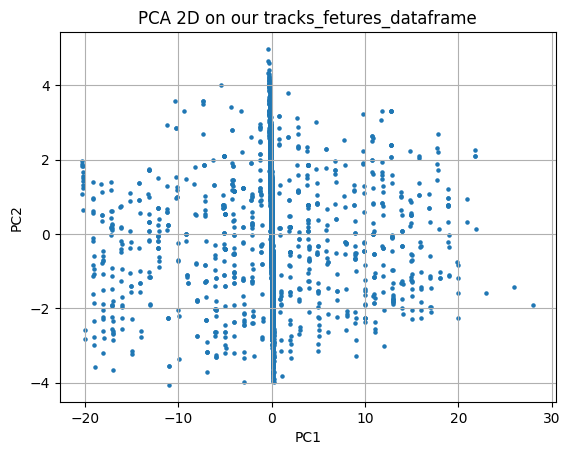

In [466]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA 2D on our tracks_fetures_dataframe')
plt.grid()
print("Transforms high-dimensions data into lower-dimensions while retaining as much information as possible.")

(10632, 3)


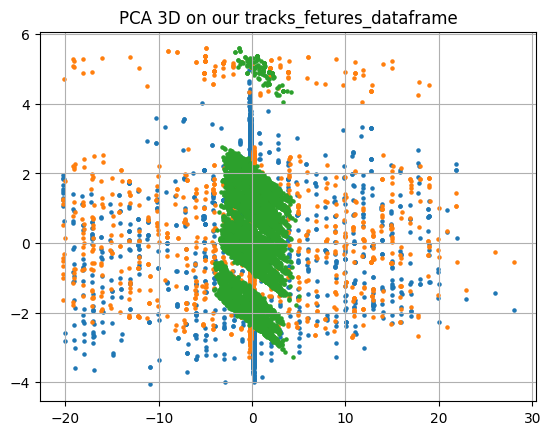

In [467]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)
plt.title('PCA 3D on our tracks_fetures_dataframe')
plt.grid()

## Regression

In [468]:
# Set random seed to make results reproducible
RANDOM_SEED = 42

In [469]:
print(columns_list)
print(len(columns_list))

['artist_name', 'energy', 'valence', 'key', 'key_mode', 'key_name', 'track_name', 'acousticness', 'liveness', 'album_release_year', 'album_release_date', 'loudness', 'popularity']
13


In [470]:
df = tracks_feature_df
regression_features = columns_list[:len(columns_list) - 1]
print(regression_features)
x=df.loc[:, regression_features].values
y=df.loc[:,'popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

['artist_name', 'energy', 'valence', 'key', 'key_mode', 'key_name', 'track_name', 'acousticness', 'liveness', 'album_release_year', 'album_release_date', 'loudness']


In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [471]:
regressor = LinearRegression(
    # pass parameters here
    fit_intercept= True , #Whether to calculate the intercept for this model. If set to False, no intercept will be used in calculations
    positive = True #When set to True, forces the coefficients to be positive. This option is only supported for dense arrays.
)
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

20.10640747793857
[0.14526687 0.         0.         0.         0.06861298 0.
 0.         0.         0.00271005 0.03866035 0.13768274 0.3117899 ]


## Evaluate Regression Algorithm

In [472]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output

,Actual,Predicted
0,13.000000,20.135289
1,20.113856,20.493101
2,20.113856,20.241974
3,20.113856,20.192637
4,20.113856,20.145616
...,...,...
3185,20.113856,20.340383
3186,12.000000,20.478121
3187,20.113856,19.412831
3188,20.113856,19.878669


In [473]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9743043952982192
Mean Squared Error: 8.759776196620663
Root Mean Squared Error: 2.9596919090710547


# Classification

## Prepare Labels

In [474]:
tracks_feature_df[['artist_name']] = spotify_df[['artist_name']]
tracks_feature_df

,artist_name,energy,valence,key,key_mode,key_name,track_name,acousticness,liveness,album_release_year,album_release_date,loudness,popularity
0,Salar Aghili,-0.440144,-0.504217,-1.432162,-0.575831,-0.626632,-0.459141,0.721928,-0.369816,0.164880,-0.407839,0.629863,20.113856
1,Salar Aghili,-1.449424,-0.437288,-0.056665,0.714117,0.797556,-1.438468,1.134163,-0.723920,0.164880,-0.407839,0.013646,20.113856
2,Salar Aghili,-0.179551,0.211093,-0.056665,0.857445,0.797556,1.291373,0.171232,-0.537822,0.164880,-0.407839,1.015921,20.113856
3,Salar Aghili,-1.482515,-0.023160,-0.881964,-0.002521,-0.056957,0.358196,0.961087,0.121278,0.164880,-0.407839,-0.481195,20.113856
4,Salar Aghili,-0.220915,-0.169569,-1.432162,-0.575831,-0.626632,-1.161100,0.149205,-0.473204,0.164880,-0.407839,0.948610,20.113856
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,Shahram Nazeri,0.010723,-0.228132,-0.331765,0.570789,0.512719,1.734424,1.058639,1.032386,0.014256,-1.386603,-0.159407,20.113856
10628,Shahram Nazeri,-1.379105,-1.211161,-0.056665,0.857445,0.797556,-0.987571,1.171925,3.061378,0.113238,-1.141369,-1.621347,20.113856
10629,Shahram Nazeri,-1.151603,-1.303190,0.768633,1.574082,1.652069,1.140920,0.860389,0.450827,0.113238,-1.141369,-1.258088,20.113856
10630,Shahram Nazeri,-0.795874,-1.006189,0.768633,1.574082,1.652069,0.824323,0.731369,3.907869,0.113238,-1.141369,-0.698108,20.113856


In [475]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh',
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani',
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami',
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [476]:
# To be completed
# Define a function to check if an artist is sonnati
def is_sonnati(artist):
    if artist in sonnati_artists:
        return 1  # Artist is sonnati
    else:
        return 0  # Artist is not sonnati

# Add the 'is_sonnati' column using the apply() method
tracks_feature_df['is_sonnati'] = tracks_feature_df['artist_name'].apply(is_sonnati)


In [478]:
tracks_feature_df.head()

,artist_name,energy,valence,key,key_mode,key_name,track_name,acousticness,liveness,album_release_year,album_release_date,loudness,popularity,is_sonnati
0,Salar Aghili,-0.440144,-0.504217,-1.432162,-0.575831,-0.626632,-0.459141,0.721928,-0.369816,0.16488,-0.407839,0.629863,20.113856,1
1,Salar Aghili,-1.449424,-0.437288,-0.056665,0.714117,0.797556,-1.438468,1.134163,-0.723920,0.16488,-0.407839,0.013646,20.113856,1
2,Salar Aghili,-0.179551,0.211093,-0.056665,0.857445,0.797556,1.291373,0.171232,-0.537822,0.16488,-0.407839,1.015921,20.113856,1
3,Salar Aghili,-1.482515,-0.023160,-0.881964,-0.002521,-0.056957,0.358196,0.961087,0.121278,0.16488,-0.407839,-0.481195,20.113856,1
4,Salar Aghili,-0.220915,-0.169569,-1.432162,-0.575831,-0.626632,-1.161100,0.149205,-0.473204,0.16488,-0.407839,0.948610,20.113856,1


In [ ]:
tracks_feature_df

,energy,valence,acousticness,track_name,popularity,liveness,danceability,artist_name,is_sonnati
0,-0.440144,-0.504217,0.721928,-0.459141,0.000000,-0.369816,-0.428643,Salar Aghili,1
1,-1.449424,-0.437288,1.134163,-1.438468,0.000000,-0.723920,-0.765201,Salar Aghili,1
2,-0.179551,0.211093,0.171232,1.291373,0.000000,-0.537822,-0.428643,Salar Aghili,1
3,-1.482515,-0.023160,0.961087,0.358196,0.000000,0.121278,-0.132704,Salar Aghili,1
4,-0.220915,-0.169569,0.149205,-1.161100,0.000000,-0.473204,-1.217813,Salar Aghili,1
...,...,...,...,...,...,...,...,...,...
10627,0.010723,-0.228132,1.058639,1.734424,0.000000,1.032386,-0.898663,Shahram Nazeri,1
10628,-1.379105,-1.211161,1.171925,-0.987571,0.000000,3.061378,-1.119167,Shahram Nazeri,1
10629,-1.151603,-1.303190,0.860389,1.140920,0.000000,0.450827,-1.728453,Shahram Nazeri,1
10630,-0.795874,-1.006189,0.731369,0.824323,0.000000,3.907869,-1.560174,Shahram Nazeri,1


## Create Classification Dataset

In [479]:
tracks_feature_df['artist_name'] = label_encoder.fit_transform(tracks_feature_df['artist_name']) #normalization and label encoding
tracks_feature_df['artist_name'] = scaler.fit_transform(tracks_feature_df['artist_name'].values.reshape(-1,1))[:,0]
tracks_feature_df

,artist_name,energy,valence,key,key_mode,key_name,track_name,acousticness,liveness,album_release_year,album_release_date,loudness,popularity,is_sonnati
0,1.143433,-0.440144,-0.504217,-1.432162,-0.575831,-0.626632,-0.459141,0.721928,-0.369816,0.164880,-0.407839,0.629863,20.113856,1
1,1.143433,-1.449424,-0.437288,-0.056665,0.714117,0.797556,-1.438468,1.134163,-0.723920,0.164880,-0.407839,0.013646,20.113856,1
2,1.143433,-0.179551,0.211093,-0.056665,0.857445,0.797556,1.291373,0.171232,-0.537822,0.164880,-0.407839,1.015921,20.113856,1
3,1.143433,-1.482515,-0.023160,-0.881964,-0.002521,-0.056957,0.358196,0.961087,0.121278,0.164880,-0.407839,-0.481195,20.113856,1
4,1.143433,-0.220915,-0.169569,-1.432162,-0.575831,-0.626632,-1.161100,0.149205,-0.473204,0.164880,-0.407839,0.948610,20.113856,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,1.292666,0.010723,-0.228132,-0.331765,0.570789,0.512719,1.734424,1.058639,1.032386,0.014256,-1.386603,-0.159407,20.113856,1
10628,1.292666,-1.379105,-1.211161,-0.056665,0.857445,0.797556,-0.987571,1.171925,3.061378,0.113238,-1.141369,-1.621347,20.113856,1
10629,1.292666,-1.151603,-1.303190,0.768633,1.574082,1.652069,1.140920,0.860389,0.450827,0.113238,-1.141369,-1.258088,20.113856,1
10630,1.292666,-0.795874,-1.006189,0.768633,1.574082,1.652069,0.824323,0.731369,3.907869,0.113238,-1.141369,-0.698108,20.113856,1


In [480]:
x = tracks_feature_df.reset_index().drop(columns=['is_sonnati','popularity','artist_name']).values
y = tracks_feature_df['is_sonnati'].values

In [481]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10632, 12)
y.shape=(10632,)


In [482]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`)


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [483]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset

    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)

    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )

    # train model
    classifier = make_pipeline(StandardScaler(), model)

    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])

    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)

    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

In [484]:
# here is an example
dataset = (x, y)
pprint(fit_and_eval(KNeighborsClassifier(n_neighbors=1), dataset))

{'acc': 0.7846394984326018,
 'confusion': array([[1734,  361],
       [ 326,  769]]),
 'f1': 0.6912359550561797,
 'precision': 0.6805309734513274,
 'recall': 0.7022831050228311}


In [485]:
#autograde
# the best model you want to be evaluated. Just pass do the same way as above cell
pprint(fit_and_eval(KNeighborsClassifier(n_neighbors=4, weights = 'uniform',  p=2), dataset))
#uniform weights. All points in each neighborhood are weighted equally.
#distance weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away

{'acc': 0.7818181818181819,
 'confusion': array([[1843,  252],
       [ 444,  651]]),
 'f1': 0.6516516516516517,
 'precision': 0.7209302325581395,
 'recall': 0.5945205479452055}


In [ ]:
 #When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2